<a href="https://colab.research.google.com/github/ibonetc/AI_Deep-Learning/blob/main/DL_EjemploFashionMNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo tensorflow con MNIST

In [ ]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


2.17.1


## Base de datos MNIST

<table>
  <tr>
    <th>Label</th>    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
class_names= ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Botín']

In [ ]:
fashion_mnist= keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


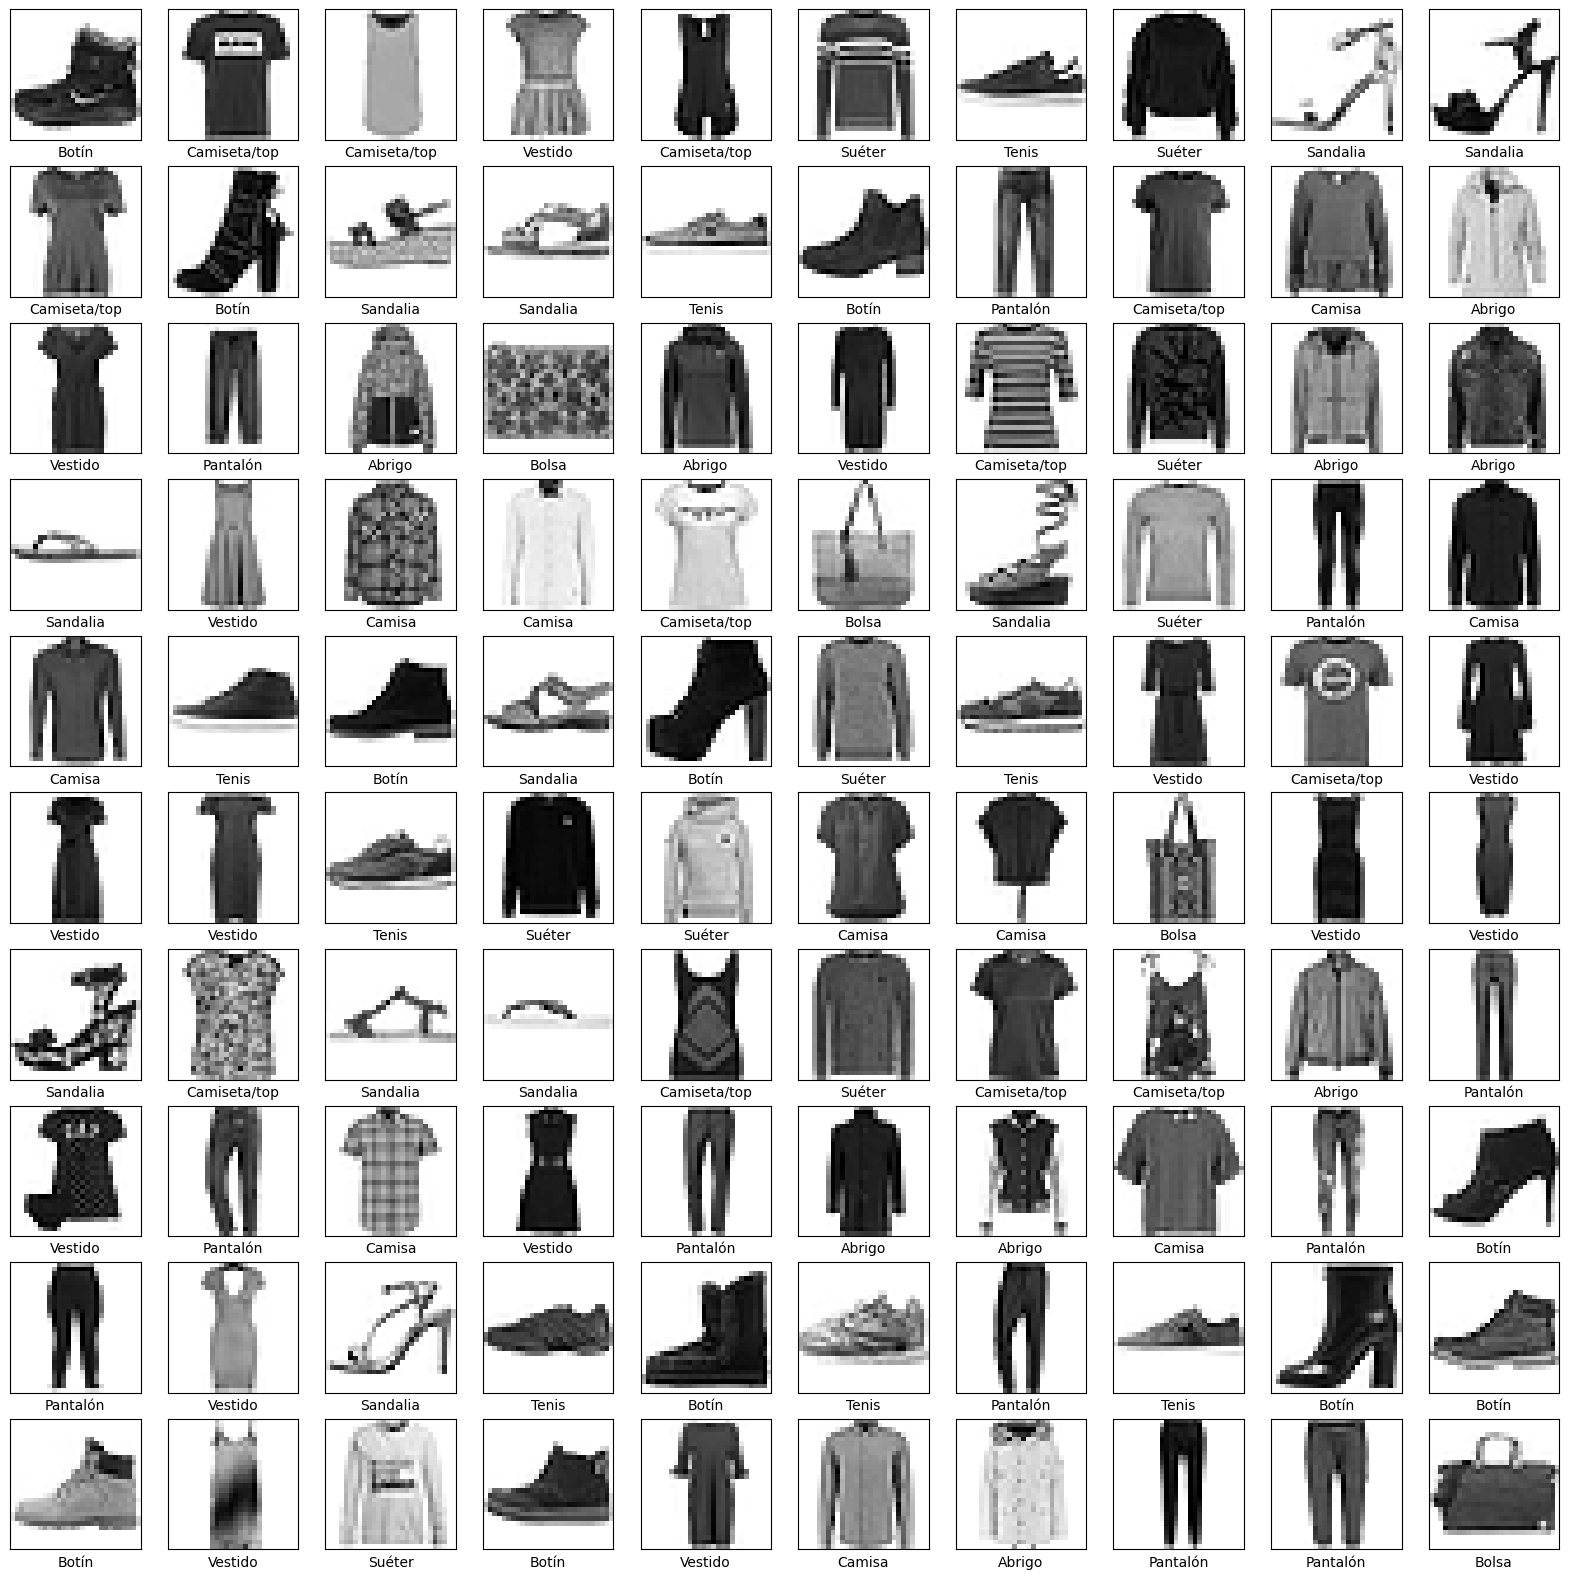

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

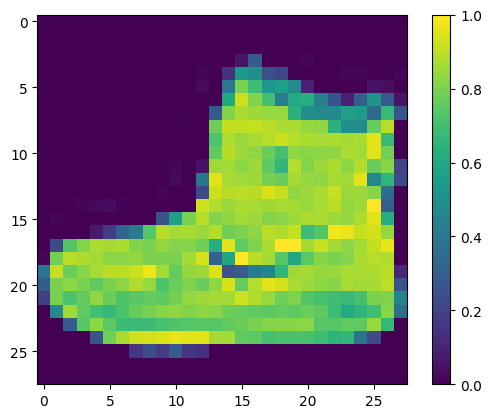

In [ ]:
plt.figure()
plt.imshow(train_images[0]/255)
plt.colorbar()
plt.show()

In [ ]:
train_imagesN=train_images/255
test_imagesN=test_images/255

## Modelo de red MLP con capas Dense

### Definición de la topología

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, MaxPooling2D,AveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras import Model, Input

In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

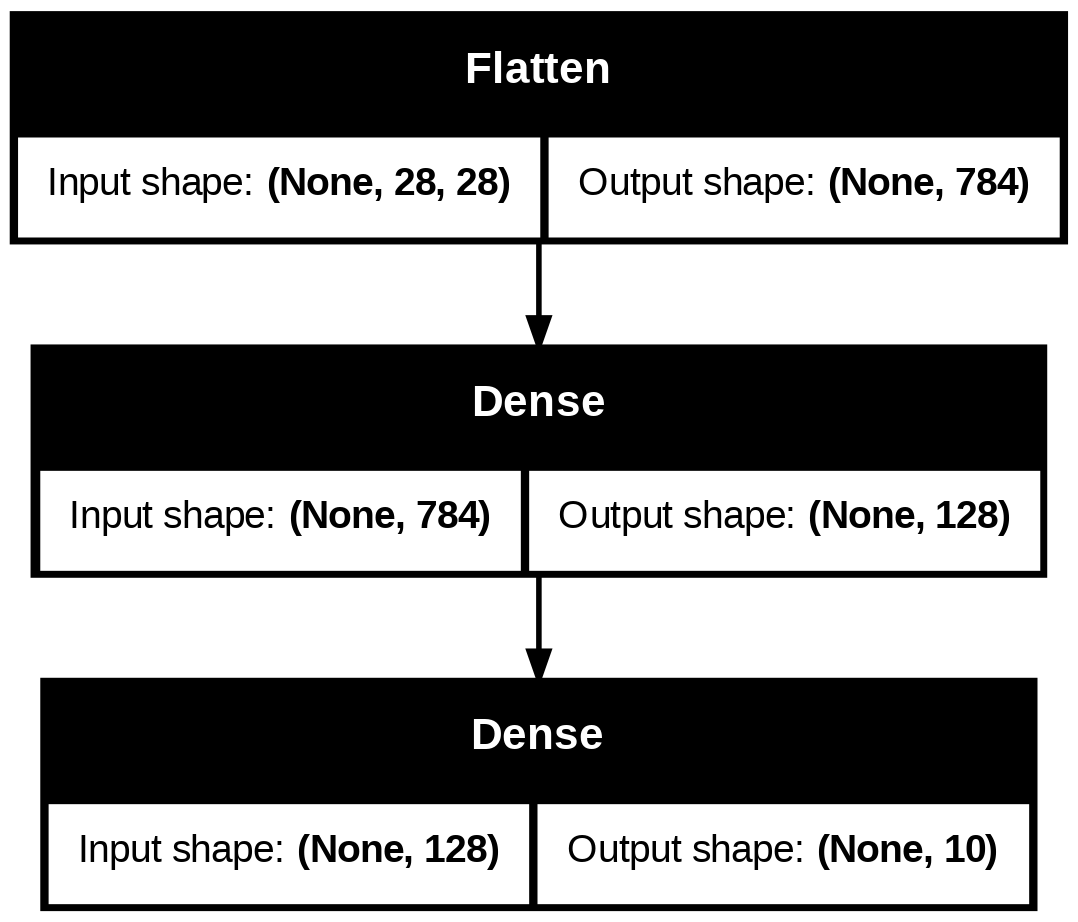

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
l_in= Input(shape=(28,28))
l_n=Flatten()(l_in)
l_n=Dense(128, activation=tf.nn.relu)(l_n)
output=Dense(10, activation=tf.nn.softmax)(l_n)
model=Model(inputs=l_in, outputs=output)

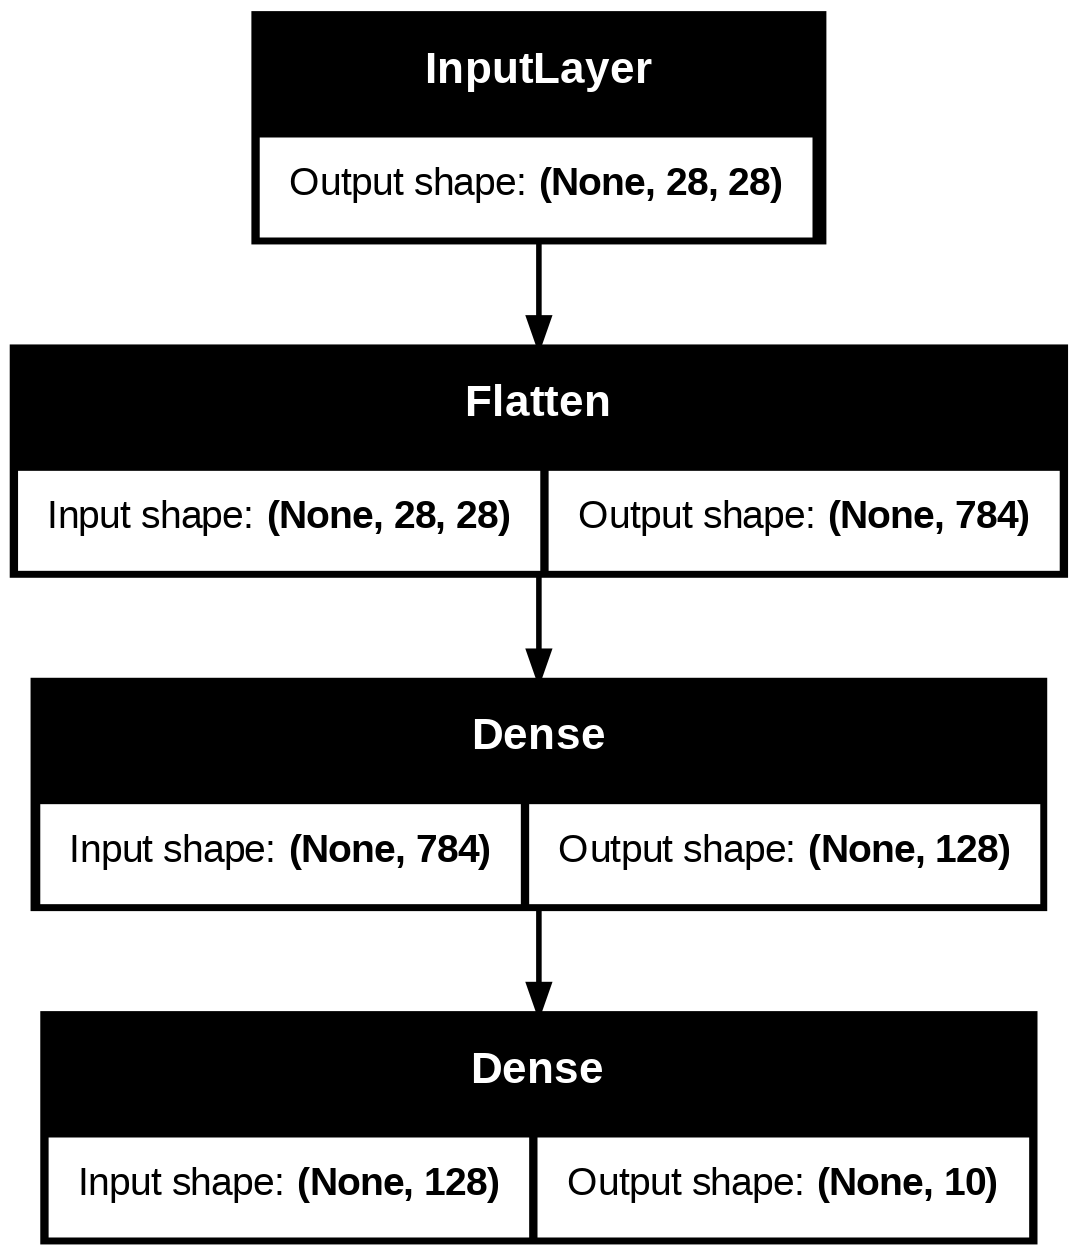

In [ ]:
plot_model(model, show_shapes=True)

### Definir el algoritmo de aprendizaje y las métricas

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])

### Entrenar el modelo

In [ ]:
history=model.fit(train_imagesN, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - acc: 0.7803 - loss: 0.6345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8636 - loss: 0.3804
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8787 - loss: 0.3351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8876 - loss: 0.3102
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8909 - loss: 0.2953
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8954 - loss: 0.2794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9018 - loss: 0.2694
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9069 - loss: 0.2542
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.9110 - loss: 0.2408
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9125 - loss: 0.2337


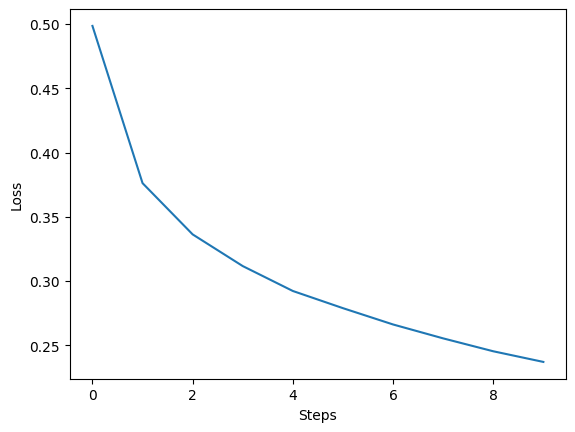

In [ ]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.plot(history.history['loss'])

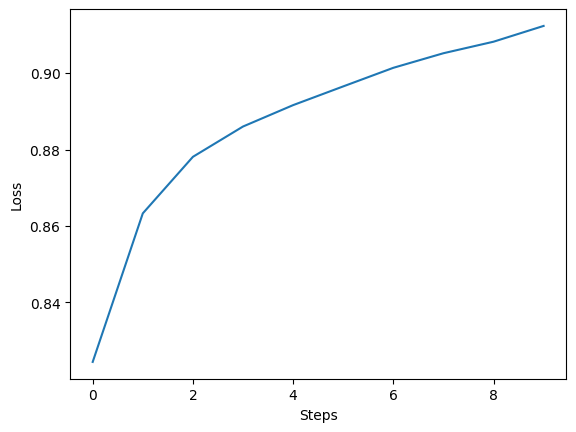

In [ ]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Steps')
plt.plot(history.history['acc'])

In [ ]:
test_loss, test_acc=model.evaluate(test_imagesN,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8794 - loss: 0.3417


In [ ]:
predictions=model.predict(test_imagesN)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
class_names

['Camiseta/top',
 'Pantalón',
 'Suéter',
 'Vestido',
 'Abrigo',
 'Sandalia',
 'Camisa',
 'Tenis',
 'Bolsa',
 'Botín']

In [ ]:
predictions[0]

array([1.27166652e-06, 1.31724525e-08, 7.47643071e-06, 1.54290532e-07,
       4.53842652e-08, 7.14146649e-04, 2.11742713e-06, 4.29619998e-02,
       9.39434557e-08, 9.56312656e-01], dtype=float32)

In [ ]:
np.max(predictions[0])*100

95.63126564025879

In [ ]:
class_names[np.argmax(predictions[0])]

'Botín'

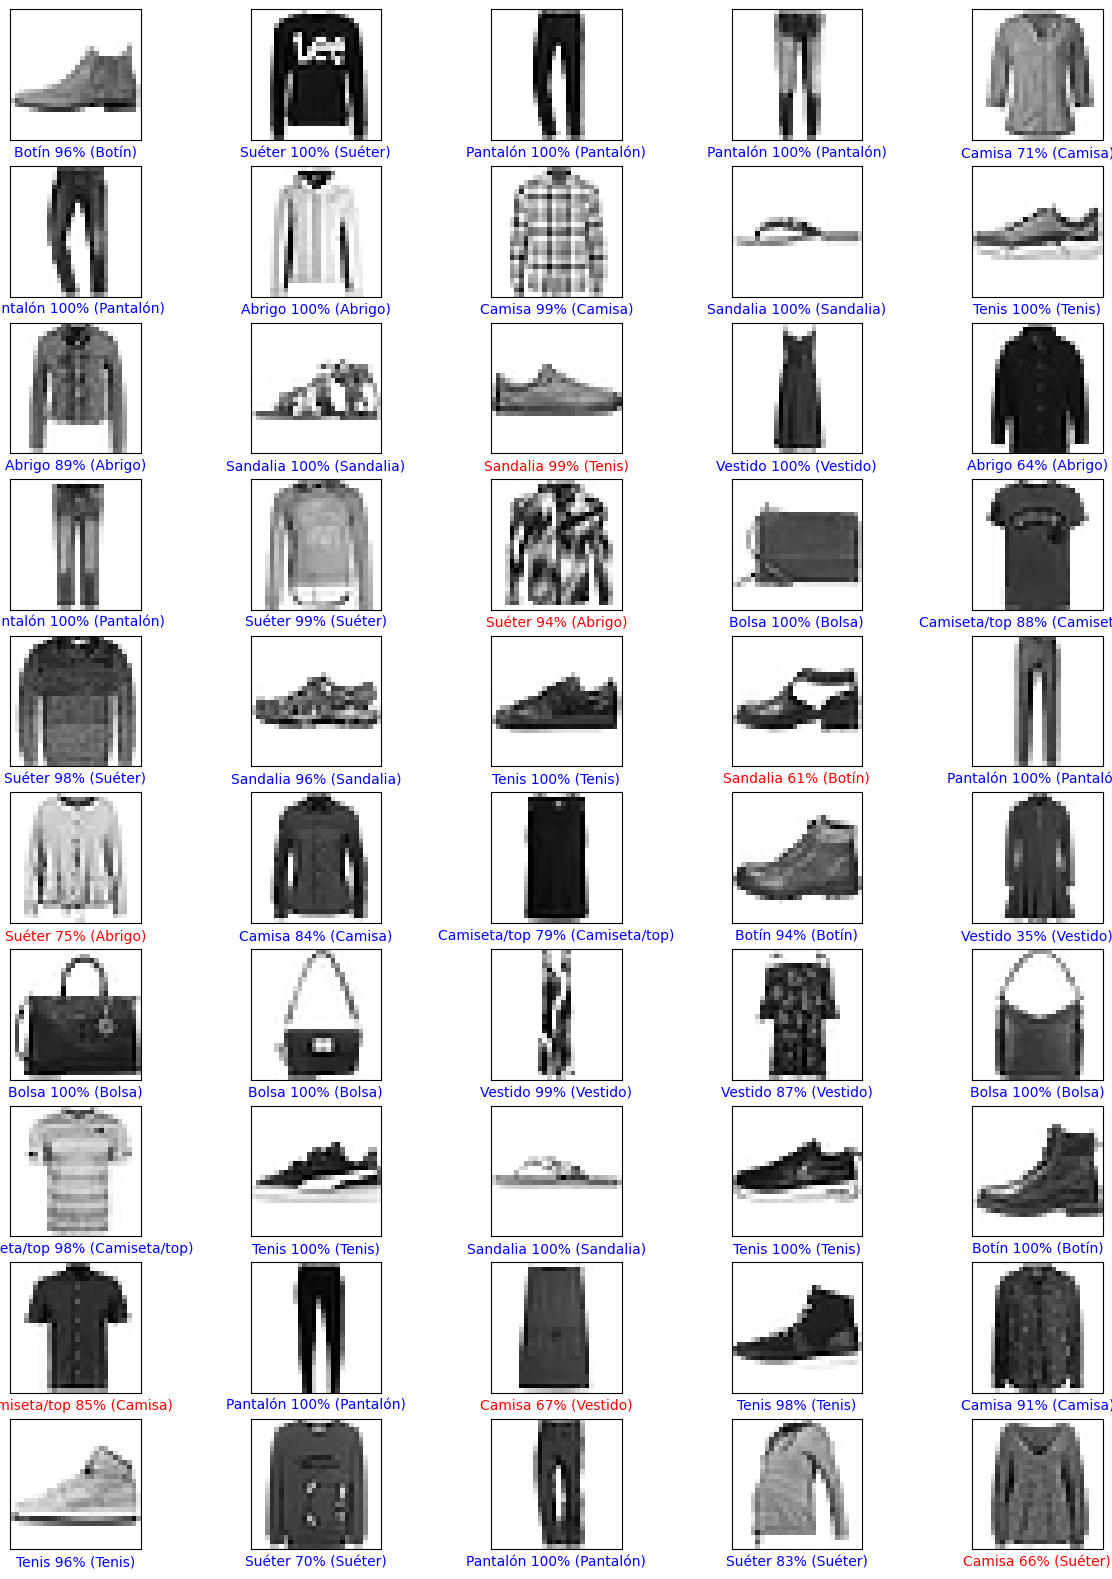

In [ ]:
plt.figure(figsize=(15,20))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_imagesN[i], cmap=plt.cm.binary)
  predict_label=np.argmax(predictions[i])
  color= 'blue' if predict_label== test_labels[i] else 'red'
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predict_label],
             100*np.max(predictions[i]),
             class_names[test_labels[i]]
                                       ),
             color=color)
plt.show()

### Predecir una sola imagen

In [ ]:
test_imagesN.shape

(10000, 28, 28)

In [ ]:
img=test_imagesN[0]
img.shape

(28, 28)

In [ ]:
img=(np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [ ]:
model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


array([[1.27167027e-06, 1.31724525e-08, 7.47644526e-06, 1.54290660e-07,
        4.53842652e-08, 7.14146649e-04, 2.11743122e-06, 4.29620333e-02,
        9.39434557e-08, 9.56312656e-01]], dtype=float32)

In [ ]:
class_names[np.argmax(model.predict(img))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


'Botín'

## Modelo Convolucional

In [ ]:
train_imagesN.shape

(60000, 28, 28)

In [ ]:
x_train=train_imagesN.reshape(train_imagesN.shape[0],train_imagesN.shape[1],train_imagesN.shape[2],1)
x_test=test_imagesN.reshape(test_imagesN.shape[0],test_imagesN.shape[1],test_imagesN.shape[2],1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
x_train.shape[1:4]

(28, 28, 1)

In [ ]:
modelC=Sequential()
modelC.add(Conv2D(32,kernel_size=(3,3),input_shape=(x_train.shape[1:4])))
modelC.add(Conv2D(32,kernel_size=(3,3)))
modelC.add(MaxPooling2D(pool_size=(2,2)))
modelC.add(Flatten())
modelC.add(Dense(128, activation=tf.nn.relu))
modelC.add(Dropout(0.2))
modelC.add(Dense(10, activation=tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


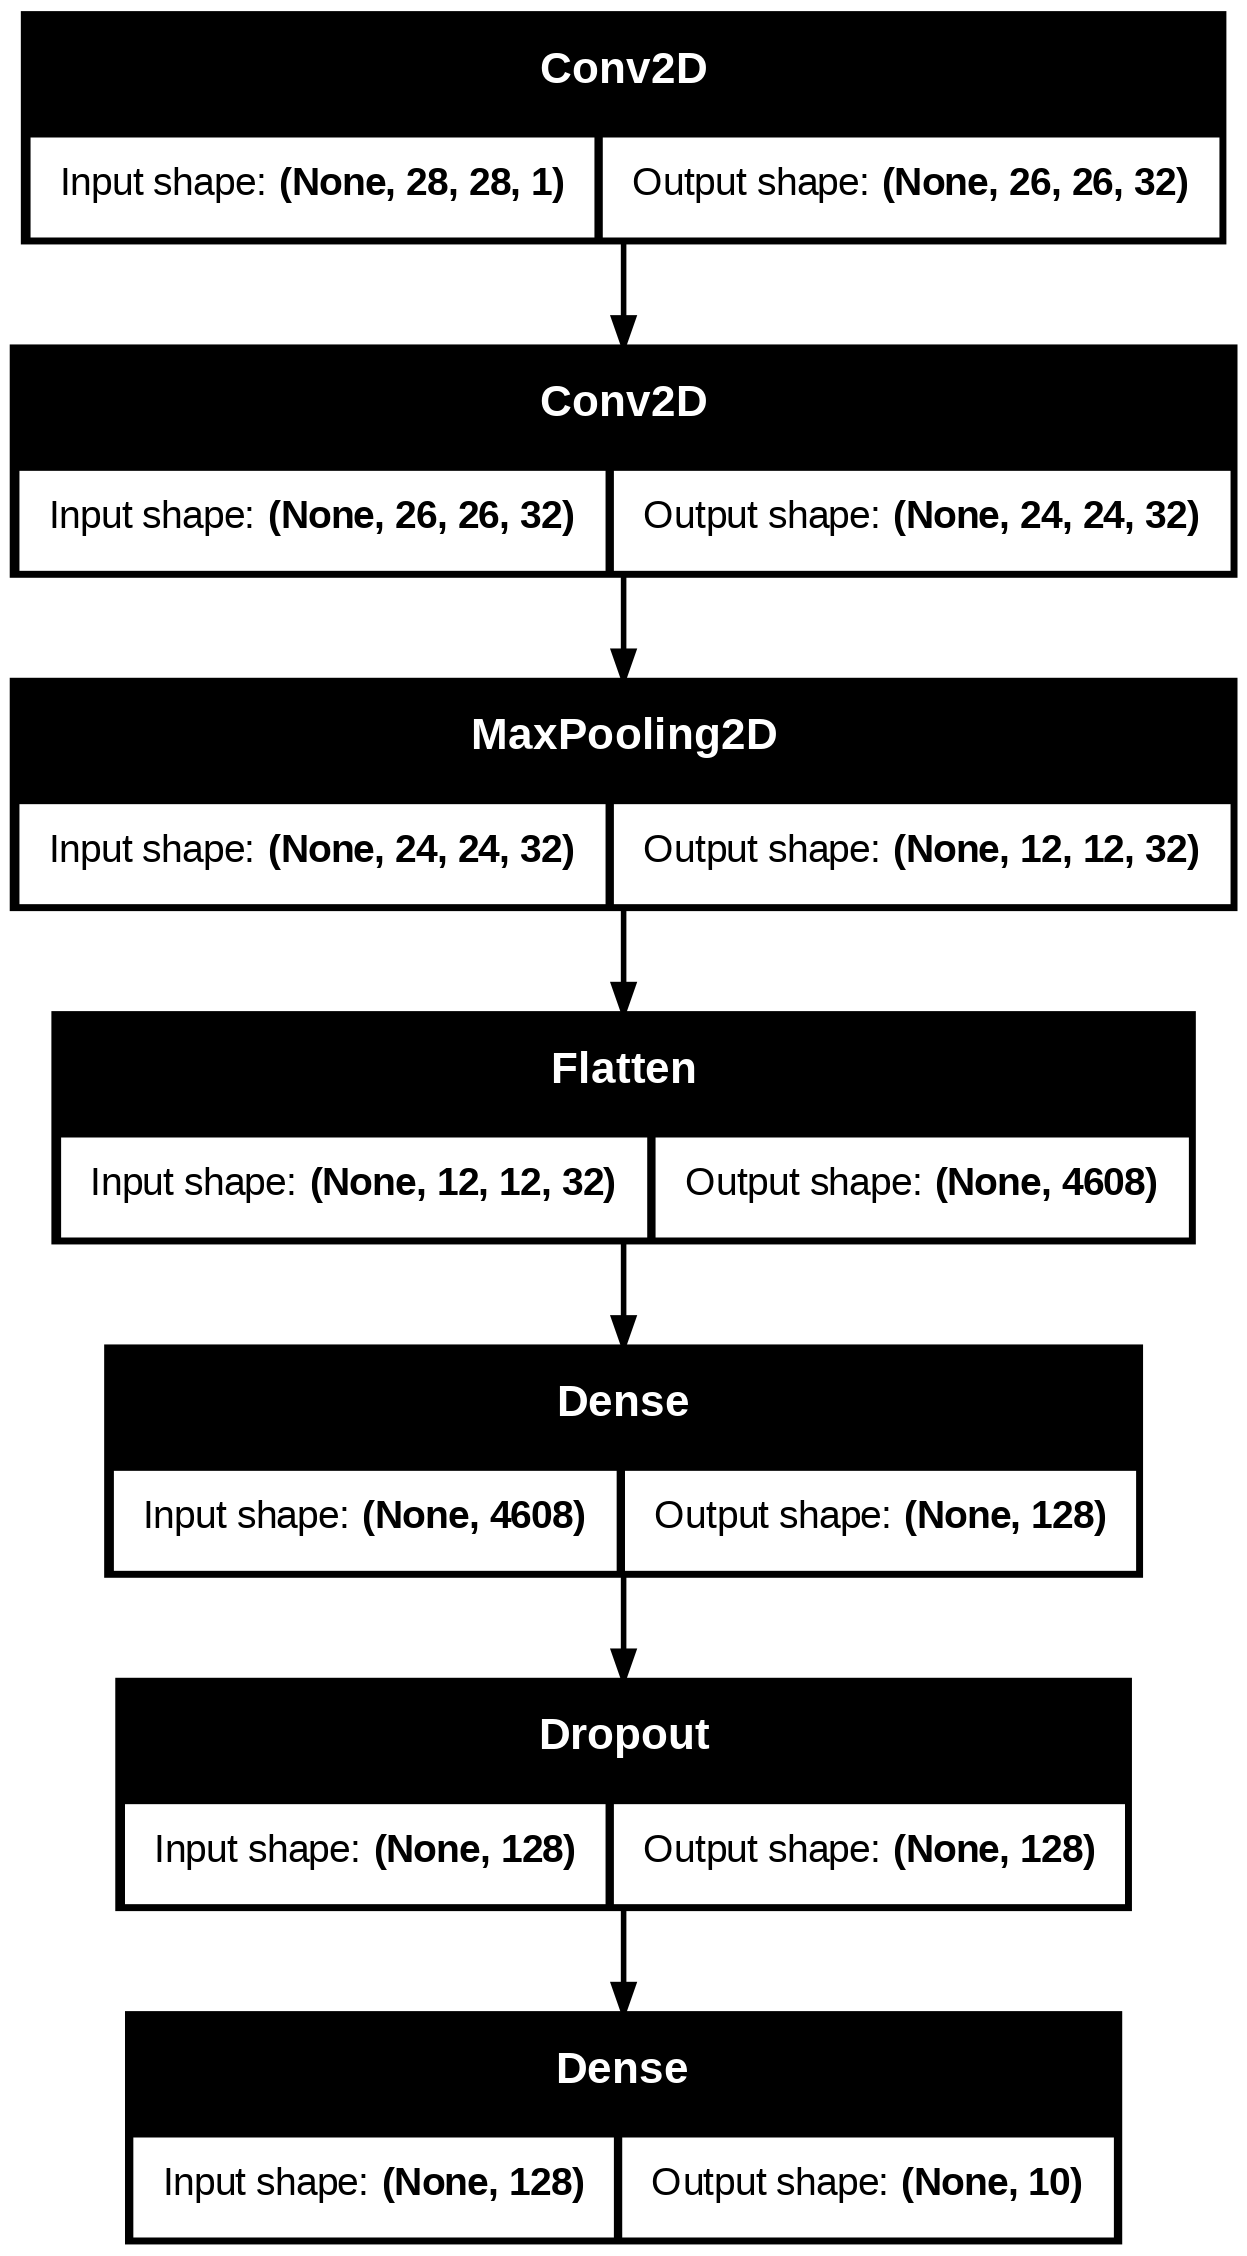

In [ ]:
plot_model(modelC, show_shapes=True)

In [ ]:
modelC.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history=modelC.fit(x_train, train_labels, epochs=20, validation_data=(x_test, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - acc: 0.8027 - loss: 0.5505 - val_acc: 0.8875 - val_loss: 0.3019
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8956 - loss: 0.2856 - val_acc: 0.8961 - val_loss: 0.2798
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9124 - loss: 0.2396 - val_acc: 0.8971 - val_loss: 0.2796
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9257 - loss: 0.2022 - val_acc: 0.9011 - val_loss: 0.2735
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9327 - loss: 0.1773 - val_acc: 0.9076 - val_loss: 0.2664
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - acc: 0.9376 - loss: 0.1621 - val_acc: 0.9094 - val_loss: 0.2738
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9475 - loss: 0.1392 - val_acc: 0.9097 - val_loss: 0.2837
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9530 - loss: 0.1242 - val_acc: 0.9052 - val_loss: 0.2868
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━

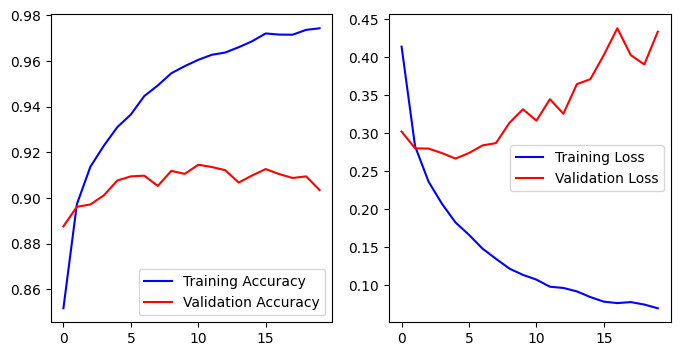

In [ ]:
acc=history.history['acc']
val_acc=history.history['val_acc']
epoch=range(len(acc))
loss=history.history['loss']
val_loss=history.history['val_loss']
f,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(epoch,acc,'blue',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'red',label='Validation Accuracy')
ax[0].legend()
ax[1].plot(epoch,loss,'blue',label='Training Loss')
ax[1].plot(epoch,val_loss,'red',label='Validation Loss')
ax[1].legend()
plt.show()